In [1]:
import requests
import pandas as pd

from tqdm import tqdm
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv("uyl_player_data.csv", index_col=0)

In [3]:
df_minutes = df.groupby('player_id')['minutes'].sum()
df_minutes = df[df.player_id.isin(df_minutes[df_minutes >= 1000].index)]
df_minutes = df_minutes.assign(name = df_minutes.uyl_name.str.cat(df_minutes.uyl_team, sep=' - '))

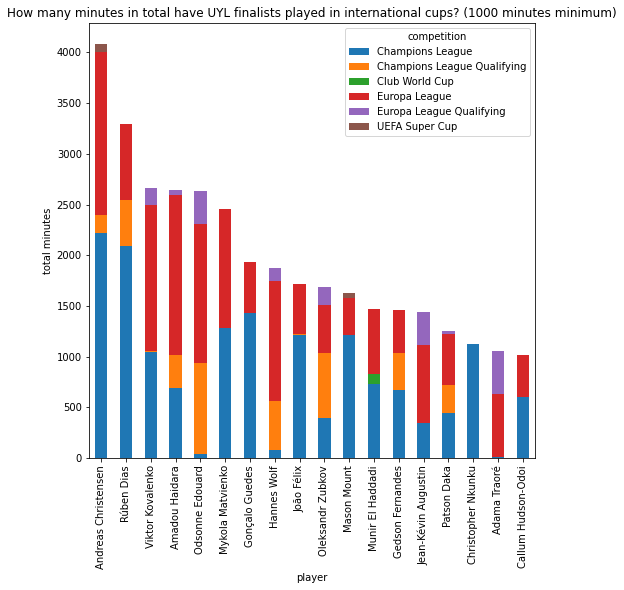

In [4]:
pd\
   .pivot_table(df_minutes, values='minutes', index='uyl_name', columns='competition', aggfunc='sum', fill_value=0, margins=True) \
   .sort_values('All', ascending=False) \
   .drop('All', axis=1) \
   .drop('All', axis=0) \
   .plot.bar(xlabel="player", ylabel="total minutes", figsize=(8,8), stacked = True, title='How many minutes in total have UYL finalists played in international cups? (1000 minutes minimum)')
pass

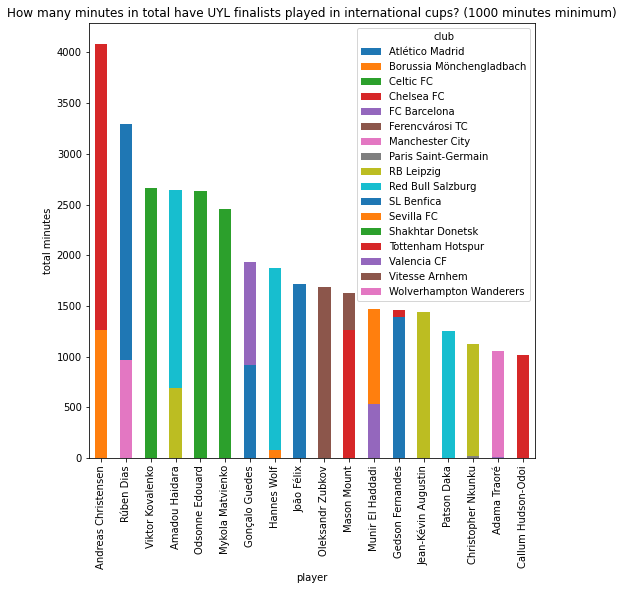

In [5]:
pd\
   .pivot_table(df_minutes, values='minutes', index='uyl_name', columns='club', aggfunc='sum', fill_value=0, margins=True) \
   .sort_values('All', ascending=False) \
   .drop('All', axis=1) \
   .drop('All', axis=0) \
   .plot.bar(xlabel="player", ylabel="total minutes", figsize=(8,8), stacked = True, title='How many minutes in total have UYL finalists played in international cups? (1000 minutes minimum)')
pass